In [1]:
# read the Data 
######################## Explain #####################
# Specify the separate between columns as a semicolon (sep=’;’)
# Specify that line 0 has the names for the columns (header=0)
# Specify that we have lots of RAM to avoid a warning that we are loading the data as an array of objects instead of an array of numbers, because of the ‘?’ values for missing data (low_memory=False).
# Specify that it is okay for Pandas to try to infer the date-time format when parsing dates, which is way faster (infer_datetime_format=True)
# Specify that we would like to parse the date and time columns together as a new column called ‘datetime’ (parse_dates={‘datetime’:[0,1]})
# Specify that we would like our new ‘datetime’ column to be the index for the DataFrame (index_col=[‘datetime’]).
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

df = pd.read_csv('F:\\projects\\python\\02 Household Power Consumption.txt',  sep=';', header = 0, low_memory=False,
                infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])


In [2]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.tail() # To show the last 5 rows

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
24/4/2007 16:30:00,0.320,0.082,235.190,1.600,0.000,2.000,0.0
24/4/2007 16:31:00,0.328,0.078,234.530,1.600,0.000,1.000,0.0
24/4/2007 16:32:00,0.344,0.088,234.900,1.800,0.000,1.000,0.0
24/4/2007 16:33:00,0.416,0.174,235.290,2.000,0.000,1.000,0.0
24/4/2007 16:34:00,0.408,0.174,234.820,2.000,0.000,1.000,0.0


In [4]:
df.shape # To know how many rows & columns

(185711, 7)

In [5]:
df.columns # Name of the columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [6]:
df.dtypes # type of Data including in the dataset 

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [7]:
# convert the object into float64
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')


In [8]:
df.dtypes # type of Data including in the dataset 

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [9]:
#####################################
# check for missing value in dataset
####################################
#check  that if there are any nan
df.isnull().sum()

Global_active_power      10
Global_reactive_power     9
Voltage                  10
Global_intensity         11
Sub_metering_1            9
Sub_metering_2            9
Sub_metering_3            9
dtype: int64

In [10]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all 

[0, 1, 2, 3, 4, 5, 6]

In [11]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [12]:
# another check to make sure that there are not any nan
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
# To know how many rows=0 for each columns

def zerow_row(df):
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    return 
zerow_row(df)

Number of rows with 0 values for each variable
Global_active_power: 0
Global_reactive_power: 52043
Voltage: 0
Global_intensity: 0
Sub_metering_1: 170580
Sub_metering_2: 131407
Sub_metering_3: 115780


In [14]:
############ calculate statistics ############
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,185711.000000,185711.000000,185711.000000,185711.000000,185711.000000,185711.000000,185711.000000
mean,1.382547,0.121663,240.641969,5.852523,1.232561,1.783675,6.553521
std,1.293234,0.112603,3.168414,5.455890,6.498592,7.162831,8.468804
min,0.104000,0.000000,223.490000,0.600000,0.000000,0.000000,0.000000
25%,0.318000,0.000000,238.700000,1.400000,0.000000,0.000000,0.000000
50%,1.218000,0.106000,240.820000,5.200000,0.000000,0.000000,0.000000
75%,2.062000,0.190000,242.770000,8.600000,0.000000,1.000000,17.000000
max,10.670000,0.874000,251.700000,46.400000,77.000000,78.000000,20.000000


In [19]:
New_df = pd.read_csv('F:\\projects\\python\\02 Household Power Consumption.txt',  sep=';', header = 0, low_memory=False,
                infer_datetime_format=True)


New_df = New_df[["Date", "Time", "Global_active_power","Global_reactive_power","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]]
New_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,15.800,0.000,1.000,17.0


In [20]:
############# plot active_power ############
New_df1 = New_df[["Date", "Global_active_power","Global_reactive_power","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]]
New_df1.set_index("Date", inplace=True)
New_df1.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,
16/12/2006,4.216,0.418,18.400,0.000,1.000,17.0
16/12/2006,5.360,0.436,23.000,0.000,1.000,16.0
16/12/2006,5.374,0.498,23.000,0.000,2.000,17.0
16/12/2006,5.388,0.502,23.000,0.000,1.000,17.0
16/12/2006,3.666,0.528,15.800,0.000,1.000,17.0


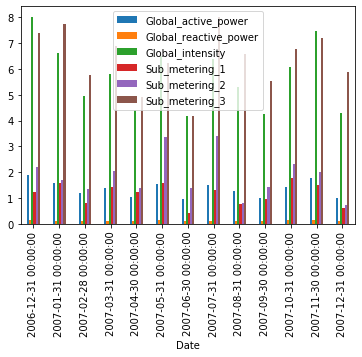

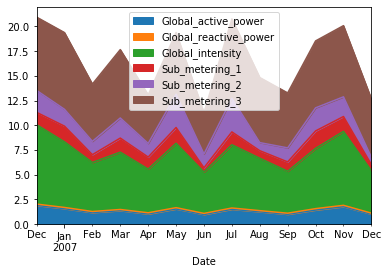

In [21]:
New_df1.index = pd.to_datetime(New_df1.index, errors='coerce')

# convert objectto float
New_df1 = New_df1.apply( pd.to_numeric, errors='coerce') 
New_df1.isnull().sum()
New_df1.resample('M').mean().plot(kind = 'bar')
#New_df1.resample('M').mean().plot.box()
New_df1.resample('M').mean().plot(kind = 'area')


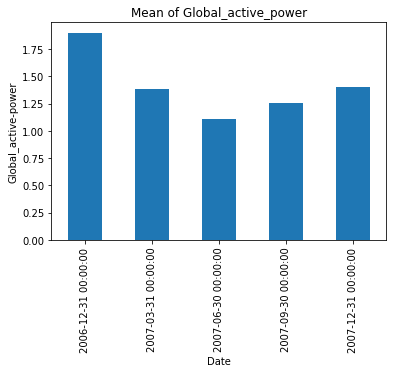

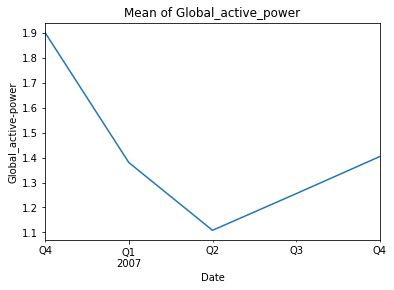

In [22]:
New_df1['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.title("Mean of Global_active_power")
plt.ylabel("Global_active-power")
plt.show()
New_df1['Global_active_power'].resample('Q').mean().plot(kind='line')
plt.title("Mean of Global_active_power")
plt.ylabel("Global_active-power")
plt.show()

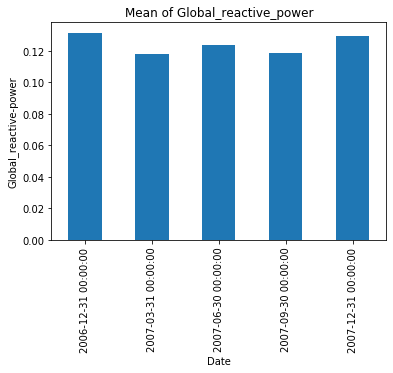

In [23]:
New_df1['Global_reactive_power'].resample('Q').mean().plot(kind='bar')

plt.title("Mean of Global_reactive_power")
plt.ylabel("Global_reactive-power")
plt.show()

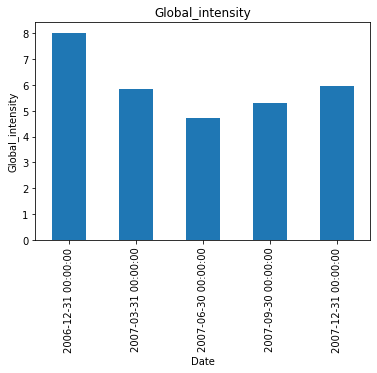

In [24]:
New_df1['Global_intensity'].resample('Q').mean().plot(kind='bar')
plt.title("Global_intensity")
plt.ylabel("Global_intensity")
plt.show()

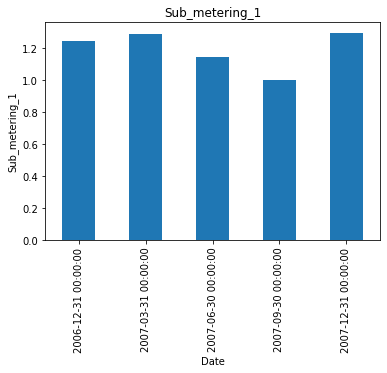

In [25]:
New_df1['Sub_metering_1'].resample('Q').mean().plot(kind='bar')
plt.title("Sub_metering_1")
plt.ylabel("Sub_metering_1")
plt.show()

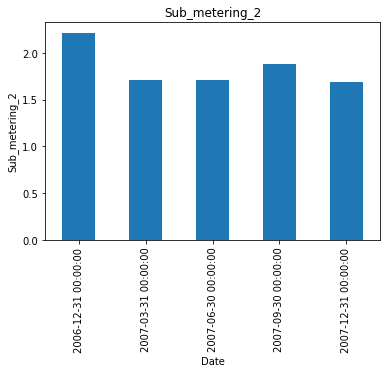

In [26]:
New_df1['Sub_metering_2'].resample('Q').mean().plot(kind='bar')
plt.title("Sub_metering_2")
plt.ylabel("Sub_metering_2")
plt.show()

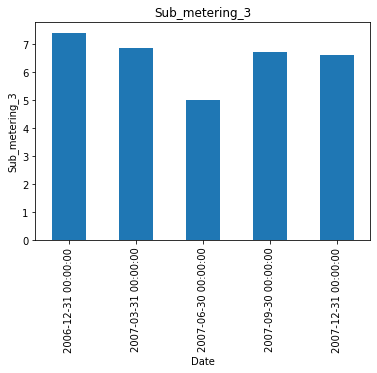

In [27]:
New_df1['Sub_metering_3'].resample('Q').mean().plot(kind='bar')
plt.title("Sub_metering_3")
plt.ylabel("Sub_metering_3")
plt.show()

In [41]:
# groupby
New_df2 = New_df1.groupby('Date')['Global_active_power'].apply(list).reset_index(name='newGlobal_active_power')

print(New_df2.head(10))


        Date                             newGlobal_active_power
0 2006-12-16  [4.216, 5.36, 5.374, 5.388, 3.6660000000000004...
1 2006-12-17  [1.044, 1.52, 3.0380000000000003, 2.9739999999...
2 2006-12-18  [0.278, 0.23800000000000002, 0.208000000000000...
3 2006-12-19  [0.414, 0.504, 0.408, 0.41600000000000004, 0.3...
4 2006-12-20  [0.8240000000000001, 0.958, 0.9740000000000001...
5 2006-12-21  [1.814, 1.474, 1.4780000000000002, 1.754, 1.46...
6 2006-12-22  [0.20600000000000002, 0.20600000000000002, 0.3...
7 2006-12-23  [2.3280000000000003, 2.316, 2.342, 0.564, 1.00...
8 2006-12-24  [5.376, 5.34, 3.6839999999999997, 3.5660000000...
9 2006-12-25  [0.586, 0.584, 0.648, 0.654, 0.655999999999999...


In [36]:
#a=int(New_df2["newGlobal_active_power"].shape[0])
#print("a=",a)
New_df2.shape

(130, 2)

In [42]:
New_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    130 non-null    datetime64[ns]
 1   newGlobal_active_power  130 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.2+ KB


In [51]:
New_df3 = pd.DataFrame({'power_consumption':df['Global_active_power']})
New_df3.head()

,power_consumption
datetime,
16/12/2006 17:24:00,4.216
16/12/2006 17:25:00,5.360
16/12/2006 17:26:00,5.374
16/12/2006 17:27:00,5.388
16/12/2006 17:28:00,3.666
